In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [2]:
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score

In [4]:
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

Logistics regression on the titanic dataset

In [5]:
df = pd.read_csv(r"C:\Projects\Consulting\Learning\Springboard\class\ScratchPad\Unit12.3.3\train-titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df[pd.isnull(df.Embarked)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


SibSp - # of siblings or spouses
Parch - number of Parents/Childress aboard

Target variable is survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

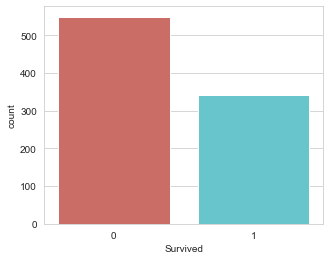

In [8]:
#Check if target is binary
sb.countplot(x="Survived", data=df, palette="hls")

In [9]:
#checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#cabin as too many missing values but is ot a good predictor but age is
titanic_data = df.drop(["Name", "Cabin", "Ticket"], axis=1)
print(titanic_data.info())
titanic_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Parch', ylabel='Age'>

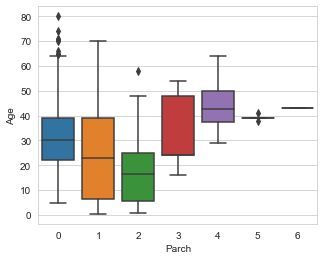

In [11]:
# understand the data distribution for age
sb.boxplot(x="Parch", y="Age", data=titanic_data)

In [12]:

parch_groups = round(titanic_data.groupby(titanic_data.Parch).mean())
parch_groups

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.0,0.0,2.0,32.0,0.0,26.0
1,465.0,1.0,2.0,24.0,1.0,47.0
2,417.0,0.0,2.0,17.0,2.0,64.0
3,579.0,1.0,3.0,33.0,1.0,26.0
4,384.0,0.0,2.0,44.0,1.0,85.0
5,435.0,0.0,3.0,39.0,1.0,33.0
6,679.0,0.0,3.0,43.0,1.0,47.0


In [13]:
# populate the missing values for age using parch_groups
#titatnic_data["Age"] = 
def fn(d):
    d.Age = parch_groups.loc[d.Parch].Age
    return d     #parch_groups.loc(d.Parch) #if pd.isnull(d.Age) else d.Age

titanic_data = titanic_data.transform(fn, axis=1)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    object
 1   Survived     891 non-null    object
 2   Pclass       891 non-null    object
 3   Sex          891 non-null    object
 4   Age          891 non-null    object
 5   SibSp        891 non-null    object
 6   Parch        891 non-null    object
 7   Fare         891 non-null    object
 8   Embarked     889 non-null    object
dtypes: object(9)
memory usage: 62.8+ KB


In [15]:
#Embarked has 2 missing data out of 891 records, therefore it is ok to drop
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace=True)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        889 non-null    int64 
 1   PassengerId  889 non-null    object
 2   Survived     889 non-null    object
 3   Pclass       889 non-null    object
 4   Sex          889 non-null    object
 5   Age          889 non-null    object
 6   SibSp        889 non-null    object
 7   Parch        889 non-null    object
 8   Fare         889 non-null    object
 9   Embarked     889 non-null    object
dtypes: int64(1), object(9)
memory usage: 69.6+ KB


In [16]:
#Convert all categorical variables to binary
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = titanic_data["Sex"]
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded.shape

(889,)

In [17]:
titanic_data.head(5) #based on the data Male=1

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,male,32,1,0,7.25,S
1,1,2,1,1,female,32,1,0,71.2833,C
2,2,3,1,3,female,32,0,0,7.925,S
3,3,4,1,1,female,32,1,0,53.1,S
4,4,5,0,3,male,32,0,0,8.05,S


In [18]:
gender_DF = pd.DataFrame(gender_encoded, columns=["Male_gender"])
gender_DF.shape

(889, 1)

In [19]:
#convert embarked to numerical
embarked_cat = titanic_data["Embarked"]
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:15]   #S=2, C=0, Q=1 

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2])

In [20]:
# to convert this to binary variable
from sklearn.preprocessing import OneHotEncoder
embarked_encoded.reshape(-1,1)
binary_encode = OneHotEncoder(categories="auto")
embarked_onehot = binary_encode.fit_transform(embarked_encoded.reshape(-1,1))
embarked_onehot.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [21]:
embarked_df = pd.DataFrame(embarked_onehot.toarray(), columns=["C","Q","S"])
embarked_df.shape

(889, 3)

In [22]:
pd.isnull(embarked_df).sum()

C    0
Q    0
S    0
dtype: int64

In [23]:
#drop the columns which have now been converted to binary
titanic_data.drop(['Sex','Embarked'], axis=1, inplace=True)

In [24]:
#pd.isnull(titanic_data).sum()
titanic_data.shape

(889, 8)

In [25]:
titanic_data[titanic_data.isnull().any(axis=1)] ##Checking for NaN values

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare


In [26]:
gender_DF[gender_DF.isnull().any(axis=1)] ##Checking for NaN values

,Male_gender


In [27]:
embarked_df[embarked_df.isnull().any(axis=1)] ##Checking for NaN values

,C,Q,S


In [30]:
#** To convert the data type of all columns to float as some of them where stored as object aka strings
titanic_dmy = pd.concat([titanic_data, gender_DF, embarked_df], axis=1, verify_integrity=False).astype(float) 
# #pd.concat([titanic_data, gender_DF], axis=1).iloc[61]
# titanic_data.reset_index()
# gender_DF.reset_index()
# titanic_data.iloc[61]
# pd.concat([titanic_data, gender_DF], axis=1).iloc[61]

In [32]:
titanic_dmy[titanic_dmy.isnull().any(axis=1)]

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male_gender,C,Q,S


<b> The data is now clean. All categorical data has been converted to numeric </b>

<AxesSubplot:>

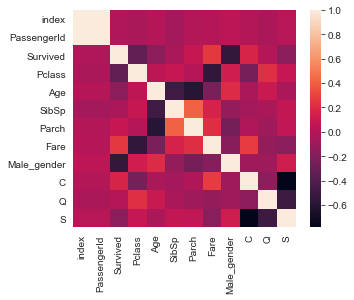

In [33]:
# Now perform a correlation analysis
sb.heatmap(titanic_dmy.corr())  # This P class and fare are collinear. Drop P Fare & Pclass

In [34]:
titanic_dmy.drop(["Fare", "Pclass"], axis=1, inplace=True)

In [35]:
titanic_dmy[pd.isna(df.PassengerId)]

<ipython-input-35-734ede1655be>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  titanic_dmy[pd.isna(df.PassengerId)]


,index,PassengerId,Survived,Age,SibSp,Parch,Male_gender,C,Q,S


<AxesSubplot:>

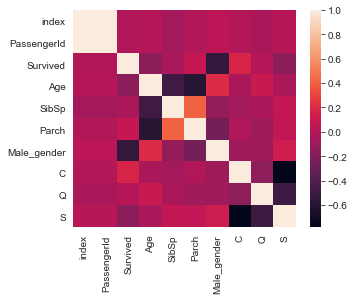

In [36]:
sb.heatmap(titanic_dmy.corr()) 

In [37]:
titanic_dmy[pd.isna(df.PassengerId)]
print(pd.isna(titanic_dmy).sum())

index          0
PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Male_gender    0
C              0
Q              0
S              0
dtype: int64


<ipython-input-37-03e23f92403b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  titanic_dmy[pd.isna(df.PassengerId)]


In [40]:
predictors = titanic_dmy.drop("Survived", axis=1)
target_prediction = titanic_dmy["Survived"]
print(pd.isna(titanic_dmy).sum())
print(predictors.info())
target_prediction.shape



index          0
PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Male_gender    0
C              0
Q              0
S              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        889 non-null    float64
 1   PassengerId  889 non-null    float64
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    float64
 5   Male_gender  889 non-null    float64
 6   C            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(9)
memory usage: 62.6 KB
None


(889,)

In [42]:
X_train, X_test, y_train, y_test=train_test_split(predictors, target_prediction, test_size=0.2, random_state=200)

In [43]:
print(X_train.shape)
print(y_train.shape)

(711, 9)
(711,)


In [44]:
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [45]:
y_pred = logreg.predict(X_test)

<b>Start Model evaluations </b>

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       109
         1.0       0.81      0.70      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



In [51]:
y_train_pred = cross_val_predict(logreg, X_train, y_train, cv=5)

In [54]:
confusion_matrix(y_train, y_train_pred)

array([[378,  62],
       [ 92, 179]], dtype=int64)

In [55]:
precision_score(y_train, y_train_pred)

0.7427385892116183

<b>Test with new data</b>

In [67]:
test_passenger = predictors [863:864]
test_passenger_target = target_prediction[863:864]
print(test_passenger, test_passenger_target)

     index  PassengerId   Age  SibSp  Parch  Male_gender    C    Q    S
863  865.0        866.0  36.0    0.0    0.0          0.0  0.0  0.0  1.0 863    1.0
Name: Survived, dtype: float64


In [68]:
#change age slightly
test_passenger.Age = test_passenger.Age + 1 
test_passenger

C:\Projects\software\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,index,PassengerId,Age,SibSp,Parch,Male_gender,C,Q,S
863,865.0,866.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
logreg.predict(test_passenger)

array([1.])

In [70]:
logreg.predict_proba(test_passenger)

array([[0.30928707, 0.69071293]])